In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 2s 0us/step


In [5]:
df =pd.read_csv(csv_path)

In [9]:
df.sample(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
220879,13.03.2013 21:40:00,980.81,-8.54,266.09,-10.46,85.90,3.20,2.75,0.45,1.74,2.80,1289.83,0.64,1.40,217.9
147445,20.10.2011 22:40:00,1000.36,0.90,274.04,0.08,94.20,6.52,6.14,0.38,3.83,6.14,1268.60,1.18,2.08,138.8
247770,16.09.2013 15:40:00,974.42,14.51,289.81,9.92,73.90,16.55,12.23,4.32,7.84,12.55,1174.40,5.55,8.05,212.4
210690,02.01.2013 03:30:00,988.07,2.09,276.20,0.00,86.00,7.10,6.11,0.99,3.85,6.18,1247.59,2.25,3.55,224.3
205372,26.11.2012 05:10:00,987.11,4.73,278.92,1.47,79.30,8.57,6.79,1.77,4.29,6.88,1234.21,2.07,2.80,210.9
31848,10.08.2009 04:10:00,988.90,15.41,289.49,12.13,80.80,17.53,14.17,3.37,8.96,14.33,1187.33,0.00,0.00,0.0
294679,07.08.2014 03:30:00,988.32,14.04,288.17,13.01,93.50,16.05,15.01,1.04,9.50,15.18,1191.91,0.60,1.30,213.6
181182,11.06.2012 05:30:00,979.67,12.81,287.65,8.66,75.80,14.81,11.23,3.58,7.16,11.46,1188.24,0.84,1.12,229.0
226752,23.04.2013 16:30:00,993.27,17.90,291.62,4.37,40.65,20.54,8.35,12.19,5.25,8.41,1185.03,2.46,5.34,270.6
146360,13.10.2011 09:50:00,1000.77,8.24,281.34,5.60,83.40,10.92,9.10,1.81,5.68,9.10,1234.65,1.52,3.28,277.8


In [10]:
df=df[5::6]

In [11]:
df.head(20)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
35,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
41,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
47,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
53,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2
59,01.01.2009 10:00:00,1000.27,-7.04,266.10,-8.17,91.6,3.60,3.30,0.30,2.05,3.29,1307.76,1.45,3.00,292.6


In [12]:
df.index=pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')

In [13]:
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


In [26]:
df.shape

(70091, 15)

<Axes: xlabel='Date Time'>

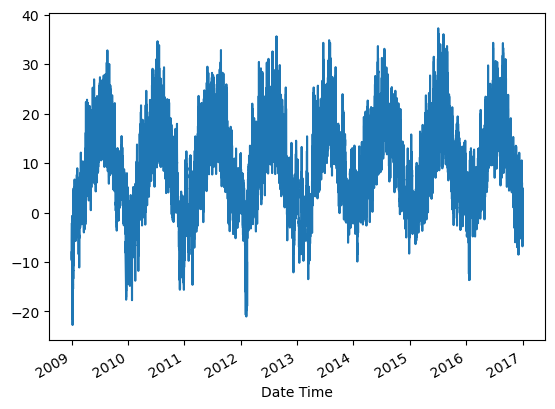

In [18]:
temp=df['T (degC)']
temp.plot()

In [19]:
def df_to_x_y(df,window_size):
    df_as_np=df.to_numpy()
    x,y=[],[]
    for i in range(len(df_as_np)-window_size):
        row=[[a] for a in df_as_np[i:i+5]]
        x.append(row)
        label=df_as_np[i+5]
        y.append(label)
    return np.array(x),np.array(y)
    

In [20]:
window_size=5
x,y=df_to_x_y(temp,window_size)
x.shape,y.shape

((70086, 5, 1), (70086,))

In [22]:
x,y

(array([[[-8.05],
         [-8.88],
         [-8.81],
         [-9.05],
         [-9.63]],
 
        [[-8.88],
         [-8.81],
         [-9.05],
         [-9.63],
         [-9.67]],
 
        [[-8.81],
         [-9.05],
         [-9.63],
         [-9.67],
         [-9.17]],
 
        ...,
 
        [[ 2.44],
         [ 1.29],
         [-0.42],
         [-0.98],
         [-1.4 ]],
 
        [[ 1.29],
         [-0.42],
         [-0.98],
         [-1.4 ],
         [-2.75]],
 
        [[-0.42],
         [-0.98],
         [-1.4 ],
         [-2.75],
         [-2.89]]]),
 array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93]))

In [23]:
x_train,y_train=x[:60000],y[:60000]
x_val,y_val=x[60000:65000],y[60000:65000]
x_test,y_test=x[65000:],y[65000:]

In [24]:
x_train.shape,x_val.shape,x_test.shape

((60000, 5, 1), (5000, 5, 1), (5086, 5, 1))

In [25]:
y_train.shape,y_val.shape,y_test.shape

((60000,), (5000,), (5086,))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [29]:
model1=Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
cp=ModelCheckpoint('model1/',save_best_only=True)
model1.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [31]:
model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,callbacks=[cp])

Epoch 1/10

1871/1875 [============================>.] - ETA: 0s - loss: 35.1022 - root_mean_squared_error: 5.9247INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 32s 15ms/step - loss: 35.0349 - root_mean_squared_error: 5.9190 - val_loss: 1.4266 - val_root_mean_squared_error: 1.1944
Epoch 2/10
1872/1875 [============================>.] - ETA: 0s - loss: 2.2195 - root_mean_squared_error: 1.4898INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 2.2178 - root_mean_squared_error: 1.4892 - val_loss: 0.6751 - val_root_mean_squared_error: 0.8216
Epoch 3/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.9727 - root_mean_squared_error: 0.9862INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.9721 - root_mean_squared_error: 0.9860 - val_loss: 0.5518 - val_root_mean_squared_error: 0.7428
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.7461 - root_mean_squared_error: 0.8638INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.7459 - root_mean_squared_error: 0.8636 - val_loss: 0.5165 - val_root_mean_squared_error: 0.7187
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6894 - root_mean_squared_error: 0.8303INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 0.6893 - root_mean_squared_error: 0.8302 - val_loss: 0.5014 - val_root_mean_squared_error: 0.7081
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6692 - root_mean_squared_error: 0.8181 - val_loss: 0.5090 - val_root_mean_squared_error: 0.7135
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6583 - root_mean_squared_error: 0.8114 - val_loss: 0.5173 - val_root_mean_squared_error: 0.7192
Epoch 8/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6519 - root_mean_squared_error: 0.8074INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.6515 - root_mean_squared_error: 0.8072 - val_loss: 0.4988 - val_root_mean_squared_error: 0.7062
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6489 - root_mean_squared_error: 0.8055INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.6489 - root_mean_squared_error: 0.8055 - val_loss: 0.4939 - val_root_mean_squared_error: 0.7028
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6448 - root_mean_squared_error: 0.8030 - val_loss: 0.4992 - val_root_mean_squared_error: 0.7066


In [32]:
from tensorflow.keras.models import load_model
model1=load_model('model1/')

In [34]:
train_predictions=model1.predict(x_train).flatten()
train_results=pd.DataFrame(data={'Train_predictions':train_predictions,'Actuals':y_train})

1875/1875 [==============================] - 6s 3ms/step


In [35]:
train_results

,Train_predictions,Actuals
0,-9.973191,-9.67
1,-9.842461,-9.17
2,-8.976688,-8.10
3,-7.396258,-7.66
4,-7.215814,-7.04
...,...,...
59995,5.973090,6.07
59996,7.227989,9.88
59997,12.115731,13.53
59998,15.917985,15.43


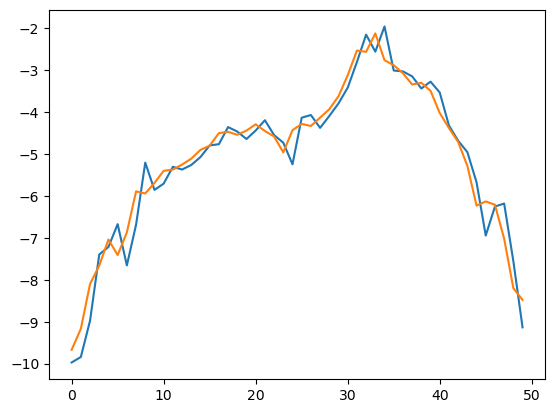

In [37]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train_predictions'][:50])
plt.plot(train_results['Actuals'][:50])